In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [239]:
attacks = pd.read_csv("../project_1/data/attacks.csv", encoding='latin1')

In [221]:
class clean(): 
        
    def __init__ (self, attacks):
        self.attacks = attacks
        
    def drop_columns (self): 
        drop_cols = ["href formula", "href", "pdf", 
                    "Investigator or Source", "Unnamed: 22", "Unnamed: 23", 
                    "Location", "Area", "Time", "Case Number.1", 
                     "Case Number.2", "Case Number", "Date"]
            
        self.attacks = self.attacks.drop(drop_cols, axis=1)
    
    def drop_rows (self):
        self.attacks = self.attacks.drop_duplicates()
        
    def fatal_clean (self): 
        replace_fatal = {" N": "N", "N ": "N", 'y': 'Y', "M" : "UNKNOWN", "2017" : "UNKNOWN"}
        
        self.attacks["Fatal (Y/N)"] = self.attacks["Fatal (Y/N)"].replace(replace_fatal)
        
    def species_clean (self): 
        pattern = r'\b(white|tiger|hammerhead|mako|bull|blacktip|wobbegong|blue|nurse|lemon|whale|bronze|spinner|whaler|silky|whitetip|basking|dusky|leopard|grey)\b'
        
        self.attacks["Species "] = self.attacks["Species "].str.lower()
        
        self.attacks["Shark Type"] = self.attacks["Species "].str.extract(pattern, flags=re.I)
        
       

In [222]:
cleaner = clean(attacks)

cleaner.drop_columns()
cleaner.drop_rows()
cleaner.fatal_clean()
cleaner.species_clean()

df = cleaner.attacks

In [238]:
species_counts = df["Shark Type"].value_counts()

species_most = species_counts.head(10)

df_common = df[df["Shark Type"].isin(species_most.index)]


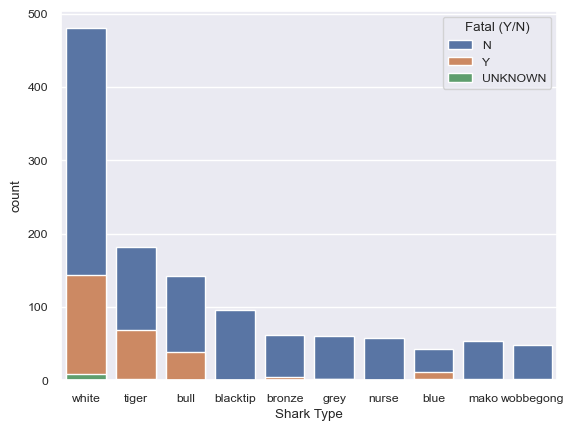

In [237]:
sns.set(font_scale = 0.8)

sns.countplot(x="Shark Type", hue = "Fatal (Y/N)", data = df_common, dodge = False,  
              order = df_common["Shark Type"].value_counts().index);
